In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
plt.style.use('ggplot')
# Disable Python INFO and WARNING messages
warnings.filterwarnings('ignore')

In [2]:
# Load real estate data 
df = pd.read_csv('data/real_estate_data.csv')
entries = df.shape[0]
features = df.shape[1]

In [3]:
# Drop duplicates observations
df = df.drop_duplicates()
print( 'Removed entries :', entries - df.shape[0] )
print( 'Removed features :', features - df.shape[1] )

Removed entries : 0
Removed features : 0


In [4]:
# Drop irrelevant observations
# None is characterized as such

In [5]:
#Fix structural errors --  binary indicator variables
# Display unique values of 'basement'
df.basement.unique()

array([ nan,   1.])

In [6]:
# Missing basement values should be 0
df['basement'] = df.basement.fillna(0)

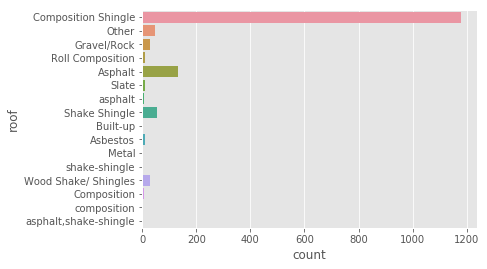

In [7]:
#Fix structural errors --  Typos and capitalization (mostly for categorical features)

# Class distributions for 'roof'
sns.countplot(y='roof', data=df)

In [8]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

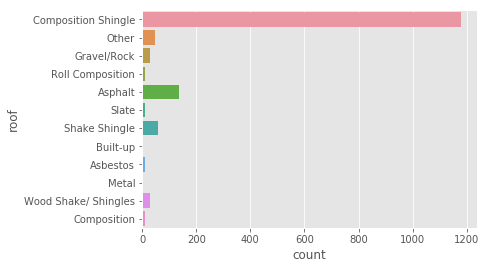

In [9]:
# New Class distribution for 'roof'
sns.countplot(y='roof', data=df)

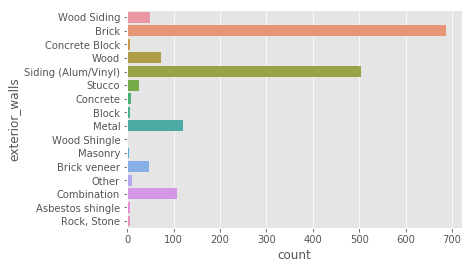

In [10]:
#Fix structural errors --  Mislabeled classes (mostly for categorical features)

# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

In [11]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace(['Rock, Stone'], 'Masonry', inplace=True)

# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete','Block'], 'Concrete Block', inplace=True)

# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

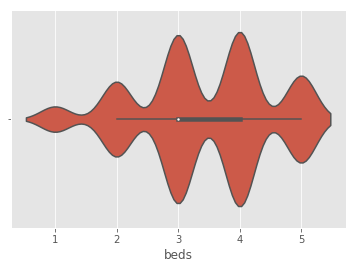

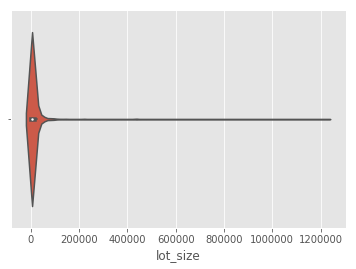

In [12]:
#Checking outliers

# Violin plot of 'tx_price'
sns.violinplot(df.tx_price)
plt.show()

# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

In [13]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [45]:
# Remove lot_size outliers
df = df[df.lot_size <= 500000]

print( 'Removed entries :', entries - df.shape[0] )
print( 'Removed features :', features - df.shape[1] )

Removed entries : 1
Removed features : 0


In [46]:
#Checking missing values for categorical features

# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [47]:
# filling missing values for each categorical feature with 'Missing'
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isnull().sum()    

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [48]:
#Checking missing values for numerical features

# Display number of missing values by numerical feature
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [49]:
# Save cleaned dataframe to new file
df.to_csv('data/cleaned_df.csv', index=None)